In [1]:
import numpy as np
import matplotlib.pyplot as plt
from EMAN2 import *

Transform({'tx':0.00,'ty':-1.00,'alpha':0.000,'mirror':0,'scale':1.0000,'type':'2d'})


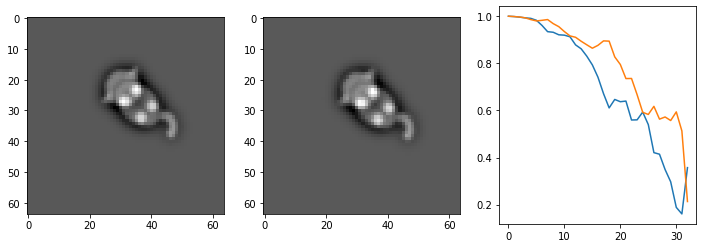

In [2]:
os.system("e2makecat.py --box 128 --size .5")

ref=EMData("cat.hdf")
xf0=Transform({'phi':135,'tx':8,'ty':-8,'type':'eman'})

pj0=ref.project("standard", xf0)
pj0.process_inplace("math.meanshrink",{"n":2})

ref.process_inplace("math.meanshrink",{"n":2})
xf1=Transform(xf0)
xf1.set_trans(xf1.get_trans()/2.)
pj1=ref.project("standard", xf1)


fsc=np.array(pj0.calc_fourier_shell_correlation(pj1))
fsc=fsc.reshape((3,-1))[1]

plt.figure(figsize=(12,4))
plt.gray()
plt.subplot(1,3,1)
plt.imshow(pj0.numpy())
plt.subplot(1,3,2)
plt.imshow(pj1.numpy())
plt.subplot(1,3,3)
plt.plot(fsc)

a=pj1.align("translational", pj0)
ts=a["xform.align2d"]
pj1.process_inplace("xform",{"transform":ts})

fsc=np.array(pj0.calc_fourier_shell_correlation(pj1))
fsc=fsc.reshape((3,-1))[1]
plt.plot(fsc)
print(ts)

Transform({'tx':0.00,'ty':0.00,'alpha':0.000,'mirror':0,'scale':1.0000,'type':'2d'})


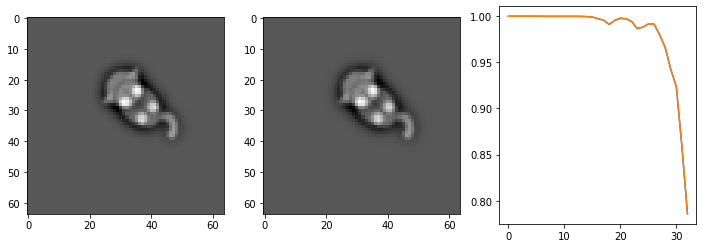

In [3]:
os.system("e2makecat.py --box 128 --size .5")

ref=EMData("cat.hdf")
xf0=Transform({'phi':135,'tx':8,'ty':-8,'type':'eman'})

pj0=ref.project("standard", xf0)
pj0.process_inplace("math.fft.resample",{"n":2})

ref.process_inplace("math.fft.resample",{"n":2})
xf1=Transform(xf0)
xf1.set_trans(xf1.get_trans()/2.)
pj1=ref.project("standard", xf1)


fsc=np.array(pj0.calc_fourier_shell_correlation(pj1))
fsc=fsc.reshape((3,-1))[1]

plt.figure(figsize=(12,4))
plt.gray()
plt.subplot(1,3,1)
plt.imshow(pj0.numpy())
plt.subplot(1,3,2)
plt.imshow(pj1.numpy())
plt.subplot(1,3,3)
plt.plot(fsc)

a=pj1.align("translational", pj0)
ts=a["xform.align2d"]
pj1.process_inplace("xform",{"transform":ts})

fsc=np.array(pj0.calc_fourier_shell_correlation(pj1))
fsc=fsc.reshape((3,-1))[1]
plt.plot(fsc)
print(ts)